## Notes and Observations:

At some point, we'll need to make a new dataframe of *neighborhoods* to examine patterns in them. This first run is just exploration of the dataset, but the value comes from examining neighborhoods.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd 
%matplotlib inline
sns.set(style='darkgrid')

In [2]:
%run jsoncleaner.py

In [4]:
df.head()

,Assessment Classification,Assessment Improvement,Assessment Land,Assessment Total,Assessment Year,Baths,Beds,Building Condition,Building Grade,Building Type,...,Most Recent Sale Price Improved,Square Footage Improved,Improvement Value Improved,Assessment Total Improved,Land Value Improved,Assessment Land Improved,Total Appraisal Value Improved,Land Area Acres,Story Height Custom,Building Type Custom
0,RES,"$86,825","$20,000","$106,825",2019,3.0,4.0,Average,C,SINGLE FAM,...,435000,4035,347300.0,106825.0,80000.0,20000.0,427300.0,2.9,2.0,SINGLE FAM
1,RES,"$85,200","$20,000","$105,200",2019,3.0,4.0,Average,C,SINGLE FAM,...,434900,3273,340800.0,105200.0,80000.0,20000.0,420800.0,2.6,1.5,SINGLE FAM
2,RES,"$46,650","$20,000","$66,650",2019,3.0,3.0,Average,C,SINGLE FAM,...,345000,2331,186600.0,66650.0,80000.0,20000.0,266600.0,2.6,1.5,SINGLE FAM
3,RES,"$46,650","$20,000","$66,650",2019,3.0,3.0,Average,C,SINGLE FAM,...,345000,2331,186600.0,66650.0,80000.0,20000.0,266600.0,2.6,1.5,SINGLE FAM
4,RES,"$19,050","$20,800","$39,850",2019,1.0,3.0,Average,C,SINGLE FAM,...,155000,1328,76200.0,39850.0,83200.0,20800.0,159400.0,2.4,1.0,SINGLE FAM


In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, scale
X= df[['Land Area Acres','Year Built','Square Footage Improved','Story Height Custom','Sale Price']].dropna()
data = pd.DataFrame(scale(X), columns=['Lot Size','Year Built','SqFt','Height','Price'])

pca = PCA(n_components=4).fit(data)
pca_samples= pca.transform(data)
print(data.head())

   Lot Size  Year Built      SqFt    Height     Price
0  4.015718    0.013263  2.140545  0.948317  0.114448
1  3.561019    0.511046  1.381210  0.003789  0.114301
2  3.561019   -0.057849  0.442504  0.003789 -0.148871
3  3.561019   -0.057849  0.442504  0.003789 -0.017211
4  3.257886   -1.835645 -0.556989 -0.940738 -0.295158


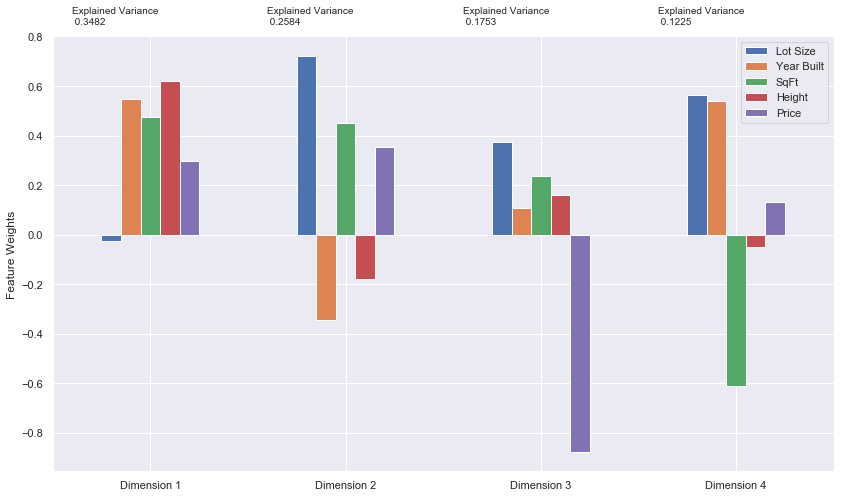

In [17]:
def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(data, pca)

In [18]:
pca_results.cumsum()

,Explained Variance,Lot Size,Year Built,SqFt,Height,Price
Dimension 1,0.3482,-0.0266,0.5492,0.4744,0.6202,0.2966
Dimension 2,0.6066,0.6939,0.2032,0.9253,0.4426,0.6520
Dimension 3,0.7819,1.0685,0.3093,1.1615,0.6028,-0.2238
Dimension 4,0.9044,1.6314,0.8490,0.5518,0.5521,-0.0914


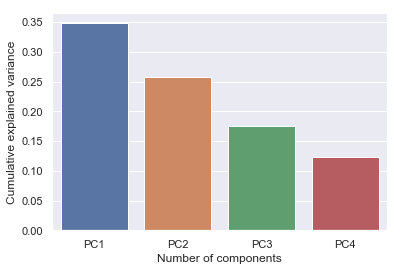

In [19]:
dfvar = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PC':['PC1','PC2','PC3','PC4']})
sns.barplot(x='PC',y="var",  
           data=dfvar);
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [20]:
pca = PCA(n_components=2).fit(data)
reduced_data = pca.transform(data)
pca_samples = pca.transform(data)
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

In [22]:
def biplot(data, reduced_data, pca):
    
    fig, ax = plt.subplots(figsize = (14,8))
    
    # scatterplot of the reduced data 
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], facecolors='b', edgecolors='b', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T

    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,

    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

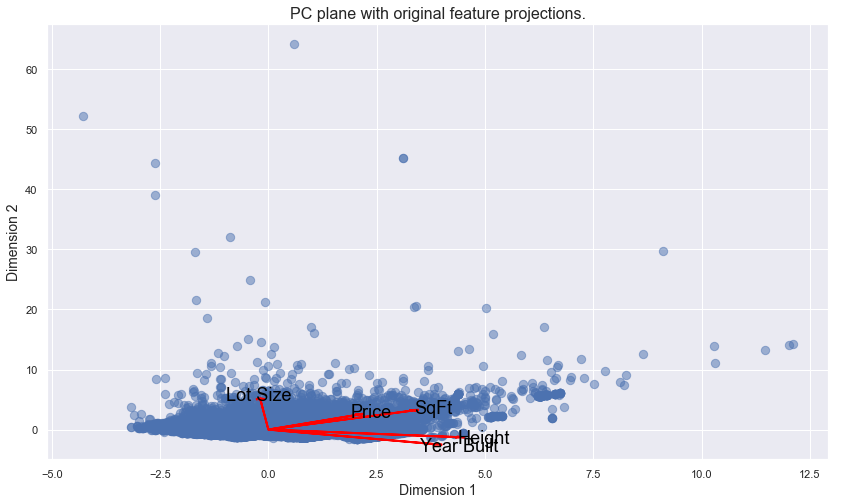

In [23]:
biplot(data, reduced_data, pca)

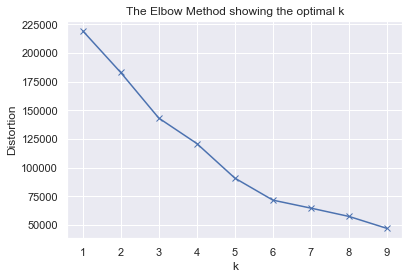

In [24]:
#Determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

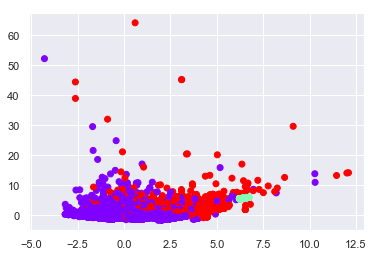

In [27]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(X)

centroid = kmeans.cluster_centers_
labels = kmeans.labels_
data['cluster'] = pd.Series(labels)

plt.scatter(reduced_data['Dimension 1'],reduced_data['Dimension 2'], c=kmeans.labels_, cmap='rainbow')